In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Params (Sun - Jupiter)
R = 627938 # in km
rP = 69911 # in km
a = 778000000000 # in km
P = 12.0*365*24 # in hours
w = 1.5*np.pi
K = 6.2
# Stellar angular velocity has to be assumed
rot = 100/R
# The sky-projected spin-orbit angle has to be assumed
angle = 10*np.pi/180

In [3]:
t = np.linspace(-P/2, P/2, 500)
v = -2*np.pi*t/P
# Taking v0 as 0
vel = K*(np.cos((w + np.pi) + (v + np.pi)))

In [4]:
# Rossiter-McLaughlin effect
tT = P*R*(1 + rP/R)/(np.pi*a)
tF = tT*(1 - rP/R)/(1 + rP/R)
d = rP**2/R**2
b = np.sqrt(((1 - d**0.5)**2 - (tF/tT)**2*(1 + d**0.5)**2)/(1 - (tF/tT)**2))
D = np.sqrt(R**2 - b**2)

In [5]:
# Ingress (between 1st and 2nd touch)
t1 = np.linspace(-tT/2, -tF/2, 500)
x1 = -a*np.sin(2*np.pi*t1/P)
y1 = x1 - D

# Calculate area covered
arg1 = y1/rP
arg1[-1] = int(arg1[-1])
first_1 = rP**2*np.arccos(arg1)
second_1 = rP*y1*np.sqrt(1 - arg1**2)
area1 = first_1 - second_1

# Calculate observed change in radial velocity
r1 = (D - rP)*np.cos(angle) - b*np.sin(angle)
h1 = (D - rP)*np.sin(angle) + b*np.cos(angle)
theta1 = np.arccos(h1/R)
sin_phi_1 = r1/(R*np.sin(theta1))
rm1 = rot*np.sin(theta1)*sin_phi_1*area1/(np.pi*R)
v1 = -2*np.pi*t1/P
vel1 = K*np.cos((w + np.pi) + (v1 + np.pi))
var1 = vel1 + rm1

In [6]:
# complete overlap (between 2nd and 3rd touch)
lim = P*np.arcsin(b*np.tan(angle)/a)/(2*np.pi)

# Blue Part
t2 = np.linspace(-tF/2, lim, 500)
x2 = a*np.sin(2*np.pi*t2/P)
r2 = x2*np.cos(angle) - b*np.sin(angle)
h2 = x2*np.sin(angle) + b*np.cos(angle)
theta2 = np.arccos(h2/R)
sin_phi_2 = r2/(R*np.sin(theta2))
rm2 = -rP**2*rot*np.sin(theta2)*sin_phi_2/R
v2 = -2*np.pi*t2/P
vel2 = K*np.cos((w + np.pi) + (v2 + np.pi))
var2 = vel2 + rm2

# Red Part
t3 = np.linspace(lim, tF/2, 500)
x3 = a*np.sin(2*np.pi*t3/P)
r3 = x3*np.cos(angle) - b*np.sin(angle)
h3 = x3*np.sin(angle) + b*np.cos(angle)
theta3 = np.arccos(h3/R)
sin_phi_3 = r3/(R*np.sin(theta3))
rm3 = -rP**2*rot*np.sin(theta3)*sin_phi_3/R
v3 = -2*np.pi*t3/P
vel3 = K*np.cos((w + np.pi) + (v3 + np.pi))
var3 = vel3 + rm3

In [7]:
# Egress (between 3rd and 4th touch)
t4 = np.linspace(tF/2, tT/2, 500)
x4 = a*np.sin(2*np.pi*t4/P)
y4 = D - x4

# Calculate area covered
arg4 = y4/rP
arg4[0] = int(arg4[0])
first_4 = rP**2*np.arccos(arg4)
second_4 = rP*y4*np.sqrt(1 - arg4**2)
area4 = np.pi*rP**2 - first_4 + second_4

# Calculate observed change in radial velocity
r4 = (D - rP)*np.cos(angle) - b*np.sin(angle)
h4 = (D - rP)*np.sin(angle) + b*np.cos(angle)
theta4 = np.arccos(h4/R)
sin_phi_4 = r1/(R*np.sin(theta4))
rm4 = -rot*np.sin(theta4)*sin_phi_4*area4/(np.pi*R)
v4 = -2*np.pi*t4/P
vel4 = K*np.cos((w + np.pi) + (v4 + np.pi))
var4 = vel4 + rm4

Text(0, 0.5, 'Radial velocity in m/s')

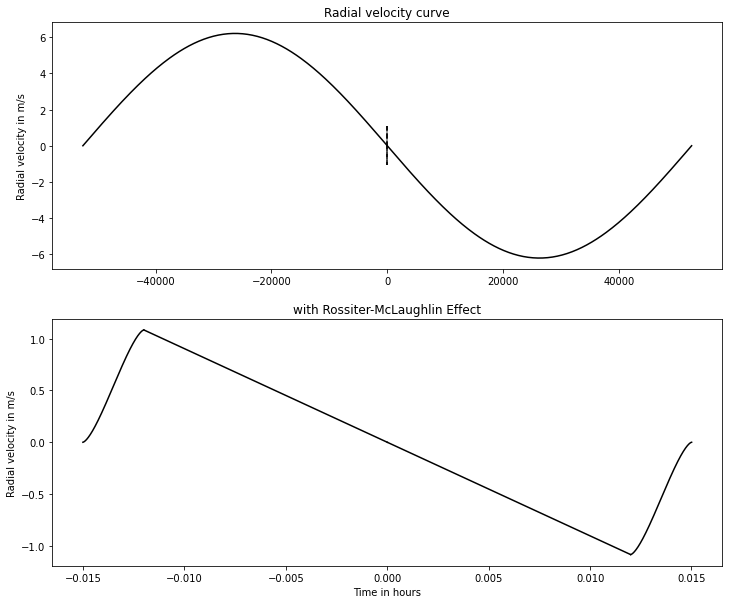

In [8]:
fig = plt.figure(figsize = (12, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


ax1.plot(t, vel, 'k')
ax1.plot(t1, var1, 'k--')
ax1.plot(t2, var2, 'k--')
ax1.plot(t3, var3, 'k--')
ax1.plot(t4, var4, 'k--')
ax1.set_title("Radial velocity curve")
ax1.set_ylabel("Radial velocity in m/s")

ax2.plot(t1, var1, 'k')
ax2.plot(t2, var2, 'k')
ax2.plot(t3, var3, 'k')
ax2.plot(t4, var4, 'k')
ax2.set_title("with Rossiter-McLaughlin Effect")
ax2.set_xlabel("Time in hours")
ax2.set_ylabel("Radial velocity in m/s")
